In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
file_paths=[f'../data/indicator_v7_data/provincelevel_GHSPop1km_{t2}_{t1}_GHSPop100m.xlsx' for t2,t1 in zip(range(1990,2021,5),range(1985,2016,5))]

In [13]:
file_paths

['../data/indicator_v7_data/provincelevel_GHSPop1km_1990_1985_GHSPop100m.xlsx',
 '../data/indicator_v7_data/provincelevel_GHSPop1km_1995_1990_GHSPop100m.xlsx',
 '../data/indicator_v7_data/provincelevel_GHSPop1km_2000_1995_GHSPop100m.xlsx',
 '../data/indicator_v7_data/provincelevel_GHSPop1km_2005_2000_GHSPop100m.xlsx',
 '../data/indicator_v7_data/provincelevel_GHSPop1km_2010_2005_GHSPop100m.xlsx',
 '../data/indicator_v7_data/provincelevel_GHSPop1km_2015_2010_GHSPop100m.xlsx',
 '../data/indicator_v7_data/provincelevel_GHSPop1km_2020_2015_GHSPop100m.xlsx']

In [15]:
df=pd.DataFrame()
for f in file_paths:
  # Read each Excel file and append its data to the DataFrame
    data = pd.read_excel(f)
    df = pd.concat([df, data], ignore_index=True)

In [16]:
df 

,City,Interval,LCR,PGR,LCRPGR,City Definition data,Built-up data,Population data,Within city definition T1 Built-up (km²),"Within city definition T1 Population (*10,000)",Within city definition T1 LCPC (m²/person),Within city definition T2 Built-up (km²),"Within city definition T2 Population (*10,000)",Within city definition T2 LCPC (m²/person),% Change in LCPC LCPC (m²/person),Built-up T1,Built-up T2,% Change in urban infill
0,Stockholm,1985-1990,0.024,0.006,3.774,GHS-Pop 1km 1990,WSF evolution 30m,GHS-Pop R2023A,205.715,123.345,166.78,232.48,127.413,182.462,9.403,205.715,232.399,12.971
1,Stockholm,1985-1990,0.006,0.006,0.966,GHS-Pop 1km 1990,GHS_Built_S,GHS-Pop R2023A,394.588,123.345,319.905,407.378,127.413,319.73,-0.055,394.588,407.094,3.169
2,Stockholm,1985-1990,0.059,0.006,9.068,GHS-Pop 1km 1990,GAIA 30m,GHS-Pop R2023A,116.439,123.345,94.401,156.144,127.413,122.55,29.818,116.439,156.084,34.048
3,Gothenburg,1985-1990,0.017,0.001,15.135,GHS-Pop 1km 1990,WSF evolution 30m,GHS-Pop R2023A,117.281,55.641,210.783,129.621,57.285,226.275,7.35,117.281,127.267,8.514
4,Gothenburg,1985-1990,0.003,0.001,3.134,GHS-Pop 1km 1990,GHS_Built_S,GHS-Pop R2023A,198.838,55.641,357.36,209.699,57.285,366.063,2.435,198.838,202.296,1.739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,Yinchuan,2015-2020,-0.095,0.029,-3.299,GHS-Pop 1km 2020,WSF 2019 10m,GHS-Pop R2023A,270.957,170.226,159.175,170.025,196.866,86.366,-45.742,270.957,169.265,-37.531
983,Yinchuan,2015-2020,0.02,0.029,0.695,GHS-Pop 1km 2020,GHS_Built_S,GHS-Pop R2023A,349.821,170.226,205.504,390.135,196.866,198.173,-3.568,349.821,386.467,10.476
984,Toronto,2015-2020,-0.093,0.010,-9.635,GHS-Pop 1km 2020,GHS-Built-S2 10m,GHS-Pop R2023A,955.723,411.754,232.11,600.469,432.122,138.958,-40.133,955.723,600.405,-37.178
985,Toronto,2015-2020,-0.115,0.010,-11.888,GHS-Pop 1km 2020,WSF 2019 10m,GHS-Pop R2023A,898.905,411.754,218.311,506.468,432.122,117.205,-46.313,898.905,506.418,-43.663


In [18]:
# Filter rows with GHS_Built_S 100m dataset
ghs_built_s_100m_data = df[df['Built-up data'].str.startswith('GHS_Built_S')]

# Filter rows with WSF dataset
wsf_data = df[df['Built-up data'].str.startswith('WSF')]

# Merge the DataFrames on the common columns (e.g., 'City' and 'YearRange')
merged_data = pd.merge(ghs_built_s_100m_data, wsf_data, on=['City', 'Interval'], suffixes=('_ghs', '_wsf'))

In [45]:
# Assuming your DataFrame is named 'result_df'
# Reset the max_rows option to the default value (which is 60)
pd.reset_option('display.max_rows')
pd.set_option('display.max_columns', None)
merged_data

,City,Interval,LCR_ghs,PGR_ghs,LCRPGR_ghs,City Definition data_ghs,Built-up data_ghs,Population data_ghs,Within city definition T1 Built-up (km²)_ghs,"Within city definition T1 Population (*10,000)_ghs",Within city definition T1 LCPC (m²/person)_ghs,Within city definition T2 Built-up (km²)_ghs,"Within city definition T2 Population (*10,000)_ghs",Within city definition T2 LCPC (m²/person)_ghs,% Change in LCPC LCPC (m²/person)_ghs,Built-up T1_ghs,Built-up T2_ghs,% Change in urban infill _ghs,LCR_wsf,PGR_wsf,LCRPGR_wsf,City Definition data_wsf,Built-up data_wsf,Population data_wsf,Within city definition T1 Built-up (km²)_wsf,"Within city definition T1 Population (*10,000)_wsf",Within city definition T1 LCPC (m²/person)_wsf,Within city definition T2 Built-up (km²)_wsf,"Within city definition T2 Population (*10,000)_wsf",Within city definition T2 LCPC (m²/person)_wsf,% Change in LCPC LCPC (m²/person)_wsf,Built-up T1_wsf,Built-up T2_wsf,% Change in urban infill _wsf,LCRPGR_Difference
0,Stockholm,1985-1990,0.006,0.006,0.966,GHS-Pop 1km 1990,GHS_Built_S,GHS-Pop R2023A,394.588,123.345,319.905,407.378,127.413,319.73,-0.055,394.588,407.094,3.169,0.024,0.006,3.774,GHS-Pop 1km 1990,WSF evolution 30m,GHS-Pop R2023A,205.715,123.345,166.78,232.48,127.413,182.462,9.403,205.715,232.399,12.971,-2.808
1,Gothenburg,1985-1990,0.003,0.001,3.134,GHS-Pop 1km 1990,GHS_Built_S,GHS-Pop R2023A,198.838,55.641,357.36,209.699,57.285,366.063,2.435,198.838,202.296,1.739,0.017,0.001,15.135,GHS-Pop 1km 1990,WSF evolution 30m,GHS-Pop R2023A,117.281,55.641,210.783,129.621,57.285,226.275,7.35,117.281,127.267,8.514,-12.001
2,Abu Dhabi,1985-1990,0.023,0.058,0.403,GHS-Pop 1km 1990,GHS_Built_S,GHS-Pop R2023A,68.475,18.893,362.443,79.724,25.456,313.188,-13.59,68.475,76.771,12.115,0.026,0.058,0.448,GHS-Pop 1km 1990,WSF evolution 30m,GHS-Pop R2023A,46.035,18.893,243.665,53.656,25.456,210.785,-13.494,46.035,52.225,13.446,-0.045
3,Accra,1985-1990,0.02,0.032,0.634,GHS-Pop 1km 1990,GHS_Built_S,GHS-Pop R2023A,655.987,167.984,390.505,856.251,216.829,394.898,1.125,655.987,715.383,9.054,0,0.032,0.001,GHS-Pop 1km 1990,WSF evolution 30m,GHS-Pop R2023A,502.927,167.984,299.389,546.717,216.829,252.143,-15.781,502.927,503.017,0.018,0.633
4,Batam,1985-1990,0.016,0.000,65.571,GHS-Pop 1km 1990,GHS_Built_S,GHS-Pop R2023A,30.53,7.279,419.421,33.043,7.288,453.392,8.1,30.53,33.043,8.23,0,0.000,0.996,GHS-Pop 1km 1990,WSF evolution 30m,GHS-Pop R2023A,24.546,7.279,337.213,24.576,7.288,337.211,-0.001,24.546,24.576,0.12,64.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Tehran,2015-2020,0.004,0.019,0.217,GHS-Pop 1km 2020,GHS_Built_S,GHS-Pop R2023A,"1,268.259","1,229.586",103.145,"1,296.37","1,351.855",95.896,-7.029,"1,268.259","1,294.506",2.07,-0.111,0.019,-5.835,GHS-Pop 1km 2020,WSF 2019 10m,GHS-Pop R2023A,"1,090.082","1,229.586",88.654,627.62,"1,351.855",46.427,-47.632,"1,090.082",627.21,-42.462,6.052
325,Tianjin,2015-2020,0.016,0.008,2.003,GHS-Pop 1km 2020,GHS_Built_S,GHS-Pop R2023A,"1,123.885",874.584,128.505,"1,458.884","1,019.282",143.129,11.38,"1,123.885","1,224.098",8.917,-0.101,0.008,-12.362,GHS-Pop 1km 2020,WSF 2019 10m,GHS-Pop R2023A,964.449,874.584,110.275,700.119,"1,019.282",68.687,-37.713,964.449,583.345,-39.515,14.365
326,Xiamen,2015-2020,0.012,-0.006,-2.189,GHS-Pop 1km 2020,GHS_Built_S,GHS-Pop R2023A,536.389,367.058,146.132,579.893,359.266,161.41,10.455,536.389,569.863,6.241,-0.144,-0.006,25.964,GHS-Pop 1km 2020,WSF 2019 10m,GHS-Pop R2023A,473.354,367.058,128.959,234.851,359.266,65.37,-49.31,473.354,230.668,-51.269,-28.153
327,Yinchuan,2015-2020,0.02,0.029,0.695,GHS-Pop 1km 2020,GHS_Built_S,GHS-Pop R2023A,349.821,170.226,205.504,390.135,196.866,198.173,-3.568,349.821,386.467,10.476,-0.095,0.029,-3.299,GHS-Pop 1km 2020,WSF 2019 10m,GHS-Pop R2023A,270.957,170.226,159.175,170.025,196.866,86.366,-45.742,270.957,169.265,-37.531,3.994


In [37]:
# Convert 'LCRPGR_ghs' and 'LCRPGR_wsf' to numeric, handling non-numeric values
merged_data['LCRPGR_ghs'] = pd.to_numeric(merged_data['LCRPGR_ghs'], errors='coerce')
merged_data['LCRPGR_wsf'] = pd.to_numeric(merged_data['LCRPGR_wsf'], errors='coerce')

# Now you can perform the subtraction without encountering a TypeError
merged_data['LCRPGR_Difference'] = merged_data['LCRPGR_ghs'] - merged_data['LCRPGR_wsf']

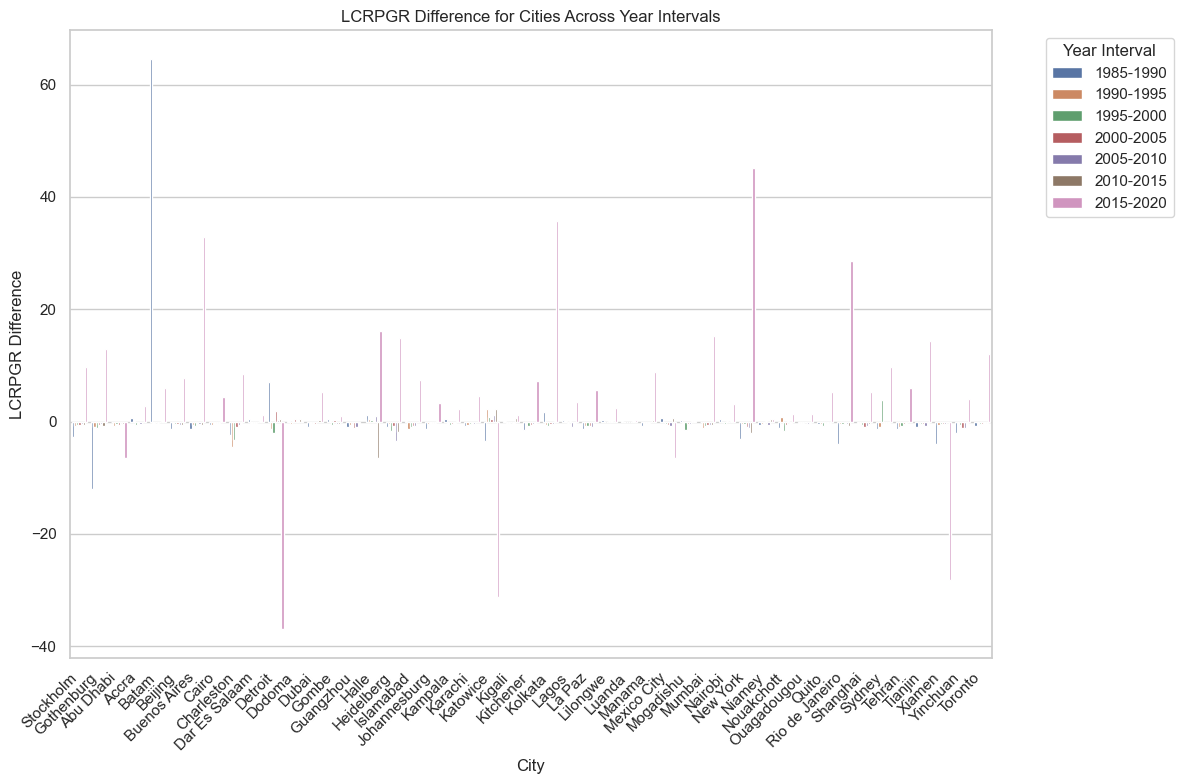

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'merged_data'
# Replace 'LCRPGR_Difference' and 'YearRange' with your actual column names

# Set the style for the plot (optional but can enhance readability)
sns.set(style="whitegrid")

# Create a bar plot with cities on the x-axis and LCRPGR differences on the y-axis
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='LCRPGR_Difference', hue='Interval', data=merged_data)
plt.title('LCRPGR Difference for Cities Across Year Intervals')
plt.xlabel('City')
plt.ylabel('LCRPGR Difference')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year Interval', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()


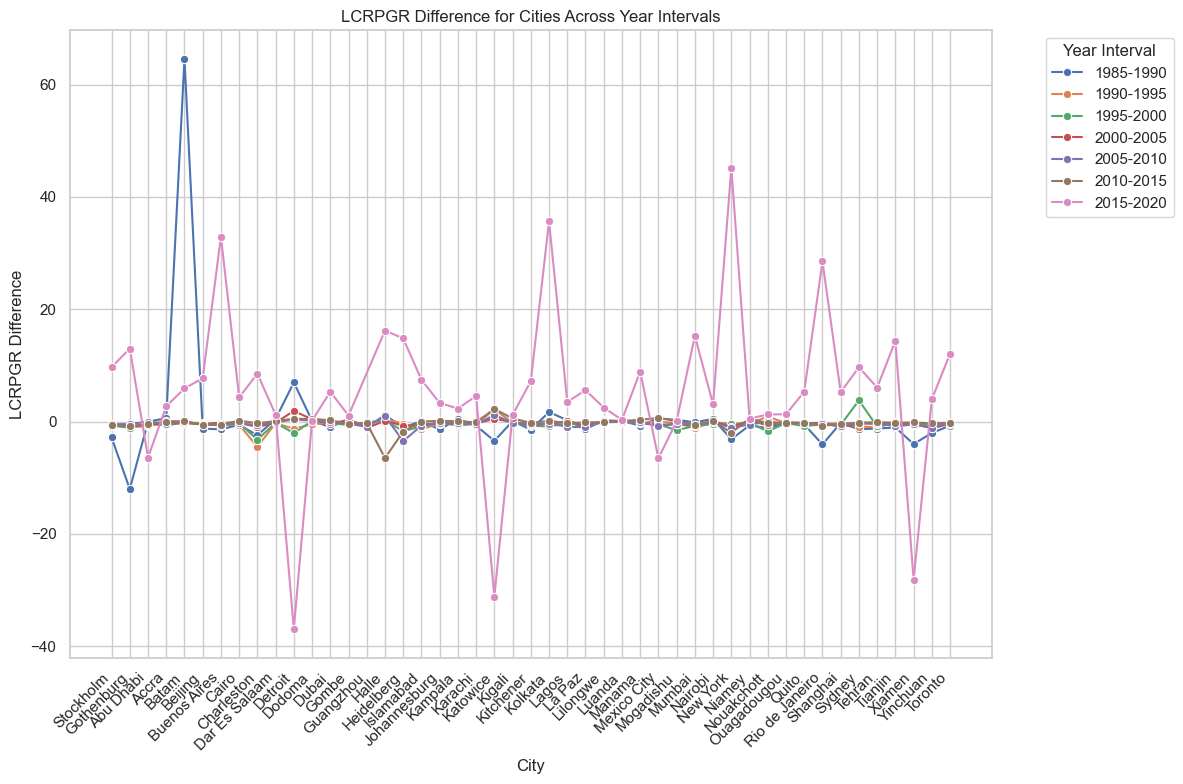

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'merged_data'
# Replace 'LCRPGR_Difference' and 'YearRange' with your actual column names

# Set the style for the plot (optional but can enhance readability)
sns.set(style="whitegrid")

# Create a line plot with cities on the x-axis and LCRPGR differences on the y-axis
plt.figure(figsize=(12, 8))
sns.lineplot(x='City', y='LCRPGR_Difference', hue='Interval', data=merged_data, marker='o')
plt.title('LCRPGR Difference for Cities Across Year Intervals')
plt.xlabel('City')
plt.ylabel('LCRPGR Difference')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year Interval', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()
